In [ ]:
#Behzad Khadim
#SP20-BCS-019
#IDS-Assignment-1

import pandas as pd
import re

from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv('gdrive/My Drive/testData/Hello-DataSet-Updates.csv')
data.head

Data Normalization

In [ ]:
df = pd.DataFrame(data, columns = ['Name', 'Gender','HSSC1','HSSC2','CGPA','FavoriteColor','BirthMonth','Weight'])

df['Name'] = df['Name'].str.title()
df['Gender'] = df['Gender'].str.title()
df['BirthMonth'] = df['BirthMonth'].str.title()
df['FavoriteColor'] = df['FavoriteColor'].str.title()
df['FavoriteColor'] = df['FavoriteColor'].str.title()

UpData = df
UpData

In [19]:
from matplotlib import pyplot as plt
import numpy as np

Pie chart to show the ratio of male and female students

In [ ]:
def label_function(val):
    return f'{val / 100 * len(UpData):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 6))

UpData.groupby('Gender').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 16},
                                  colors=['y', 'r'], title = "PIE CHART TO SHOW RATIO MALE AND FEMALE STUDENTS", ax=ax1)

plt.show()

List of Students whose name start with H

In [ ]:
search ="H"

StudentWithH = data["Name"].str.startswith(search, na = False)

#with complete information of students with H
data[StudentWithH]

#just the names of the students with H
data[StudentWithH].Name


Students having three words name

In [ ]:
UpData = pd.DataFrame({
    "Name": UpData.Name})
UpData
regularExpression = re.compile(r'^(\w+)\s+(.*?)\s+(\w+)$')

UpData[['first', 'middle', 'surname']] = df['Name'].str.extract(pat=regularExpression, expand=True)


histogram of all male students CGPA

In [ ]:
maleStudents = UpData.CGPA.where(UpData['Gender']>="Male").astype(str)

maleStudents.astype(float).hist(bins = [2.0,2.5, 2.6,3.0, 3.1,3.5, 3.6,4.0], figsize=(15,8), alpha =0.6 ,grid=False,rwidth =0.8)
plt.show


Percentage of students who have cgpa 3.0 or above

In [ ]:
students = UpData.CGPA.where(UpData['CGPA']>=3.0).astype(str)
newstudents = students.astype(float)

newstudents = newstudents.dropna()
newstudents.reset_index()
newstudents.count() * 100 /UpData.CGPA.count() 


Scatter plot of HSSC-1 between male vs female students

In [ ]:

mStudents = UpData.HSSC1.where(UpData['Gender']=="Male").astype(str)
feStudents = UpData.HSSC1.where(UpData['Gender']=="Female").astype(str)

malestd = mStudents.astype(float)
femalestd = feStudents.astype(float)
finalMale = malestd.dropna()
finalFemale = femalestd.dropna()

finalFemale

In [ ]:
raw_data = {'malestudent': finalMale, 
        'femalestudents': finalFemale}

dataframe = pd.DataFrame(raw_data, columns=['malestudent','femalestudents'])
dataframe

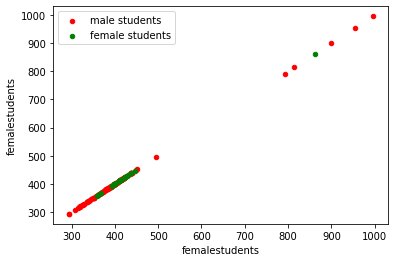

In [ ]:

dataframe['result'] = np.arange(len(dataframe))**2 * 100 + 100
test1 = dataframe.plot(kind='scatter', x='malestudent', y='malestudent', color='r', label='male students')
test2 = dataframe.plot(kind='scatter', x='femalestudents', y='femalestudents', color='g', ax=test1, label='female students')



In [5]:
UpData.columns

Index(['Name', 'Gender', 'HSSC1', 'HSSC2', 'CGPA', 'FavoriteColor',
       'BirthMonth', 'Weight'],
      dtype='object')

favorite colors of male vs female students on a bar chart.

In [ ]:
gender_column = UpData.Gender
UpData.groupby(["FavoriteColor", gender_column]).size().unstack(level=1).plot(kind='bar',figsize=(15,5))



In [ ]:
UpData.reset_index

Line chart of favourite color of students

In [ ]:
plt.figure(figsize=(120,30))
plt.plot(UpData.loc[:,"Name"],UpData.loc[:,"FavoriteColor"],color="blue",marker="o")
plt.xticks(rotation=25)

correlation matrix between HSSC-1 and HSSC-2 marks and then plot on a heatmap.

In [ ]:
dropedData = UpData.drop('CGPA', axis="columns")
cor = dropedData.corr()
cor


In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(data = cor , annot = True , cmap="rocket", center=0)

Bonus: Percentage of students with Weight 60 or above

In [32]:
students = UpData.Weight.where(UpData['Weight']>=60).astype(str)
newstudents = students.astype(float)

newstudents = newstudents.dropna()
newstudents.reset_index()
newstudents.count() * 100 /UpData.Weight.count() 

70.14925373134328

In [ ]:
Malestudents = UpData.Weight.where(UpData['Gender']=="Male").astype(str)
malestudents = Malestudents.astype(float)

Femalestudents = UpData.Weight.where(UpData['Gender']=="Female").astype(str)
femalestudents = Femalestudents.astype(float)


malestudents = malestudents.dropna()
malestudents.reset_index()

femalestudents = femalestudents.dropna()
femalestudents.reset_index()



Bonus : histogram of male studenst weights

In [ ]:

malestudents.astype(float).hist(bins = [30,40,50,60,70,90,100,110,120], figsize=(15,8), alpha =0.6 ,grid=False,rwidth =0.8)
plt.show

Bonus : Female students weight bar chart

In [ ]:
UpData.groupby(["Weight", femalestudents]).size().unstack(level=1).plot(kind='bar',figsize=(15,5))